# Data Explanation
This dataset contains 21 features that create the most impact on the Stress of a Student. The features are selected scientifically considering 5 major factors, they are Psychological, Physiological, Social, Environmental, and Academic Factors. Some of them are:
Psychological Factors => 'anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
Physiological Factors => 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem
Environmental Factors => 'noise_level', 'living_conditions', 'safety', 'basic_needs',
Academic Factors => 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns',
Social Factor => 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying'

In [538]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [539]:
# read dataset
df = pd.read_csv("Data/StressLevelDataset.csv")
df.sample(5)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
952,19,13,1,21,5,3,1,5,5,2,...,2,1,3,1,4,1,5,5,5,2
487,16,1,1,27,5,3,4,0,0,2,...,1,4,3,1,5,1,3,2,2,0
628,0,26,0,4,1,2,5,2,2,3,...,4,5,1,5,1,3,1,1,1,0
223,19,3,1,21,3,3,1,4,4,2,...,2,2,4,2,4,1,4,4,5,2
373,13,19,1,13,3,1,2,2,2,3,...,2,3,3,3,2,3,2,3,3,1


In [540]:
# Create a new column 'Student_ID' with values starting from 1
df['Student_ID'] = range(1, len(df) + 1)

# Display the updated DataFrame
df.sample(10)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,Student_ID
196,17,12,1,26,3,3,1,4,4,2,...,2,3,2,4,1,5,4,4,2,197
452,18,4,0,1,1,3,0,1,5,2,...,0,2,0,2,0,0,3,5,1,453
230,3,26,0,1,1,2,4,1,2,4,...,4,1,4,1,3,2,1,1,0,231
814,11,23,0,14,2,1,2,4,2,3,...,3,2,2,3,3,2,3,3,1,815
995,9,23,0,11,2,1,3,4,3,2,...,2,2,2,3,2,2,3,3,1,996
239,6,26,0,0,1,2,4,1,1,4,...,4,2,4,1,3,1,1,1,0,240
207,19,10,1,20,4,3,1,3,4,2,...,2,3,1,4,1,5,5,5,2,208
713,19,15,1,18,5,3,1,5,3,2,...,2,5,1,5,1,4,5,5,2,714
392,12,16,0,13,2,1,3,4,3,3,...,2,2,2,2,3,3,2,3,1,393
696,13,21,0,14,2,1,2,4,3,3,...,3,2,3,3,3,2,3,3,1,697


As seen above all features are intergers that are of different ranges. these are the explanations i could find.
- Anxiety level
    - range from 0-21
- self_esteem
    - range from 0-30
- mental_health_history
    - 0: has no history with mental health
    - 1: has history with mental health
- depression
    - Based on PHQ 9 score
    - Categorizes the severity based on value
        - 0-4: non-minimal
        - 5-9: mild
        - 10-14: moderate
        - 15-19: moderatly severe
        - 20-27: severe
- headache
    - reported severity of headaches ranging from 0-5
- blood_pressure
    - contains values 1, 2 and 3
    - interpereted as higher values having higher blood_pressure
- sleep_quality
    - 0: Very Poor Sleep Quality
    - 1: Poor Sleep Quality
    - 2: Below Average Sleep Quality
    - 3: Average Sleep Quality
    - 4: Good Sleep Quality
    - 5: Very Good Sleep Quality
- breathing_problem
    - reported severity of breathing problems ranging from 0-5
- noise_level
    - reported severity of noise levels ranging from 0-5
- living_conditions
    - reported state of living ranging from 0-5
- safety
    - reported feeling of safety ranging from 0-5
- basic_needs
    - reported state of basic needs being met ranging from 0-5
- academic_performance
    - reported acedimic performance ranging from 0-5
- study_load
    - reported severity of study load ranging from 0-5
- teacher_student_relationship
    - reported state of relation ranging from 0-5
- future_career_concerns
    - reported severity concerns ranging from 0-5
- social_support
    - ranging from 0-3
    - Interperatation of values
        - 0: no support
        - 1: minimal
        - 2: moderate
        - 3: high
- peer_pressure
    - reported severity of peer pressure ranging from 0-5
- extracurricular_activities
    - ranging from 0-5
    - interperatation of values
        - 0: no extracurricular activities
        - 1: almost never
        - 2: sometimes
        - 3: standard
        - 4: often
        - 5: very often
- bullying
    - ranging from 0-5
    - 0 being never 5 being very often
- stress_level
    - contains values 0, 1 and 2
    - interperatation of values:
        - 0: no/minimal stress
        - 1: moderate stress
        - 2: high stress

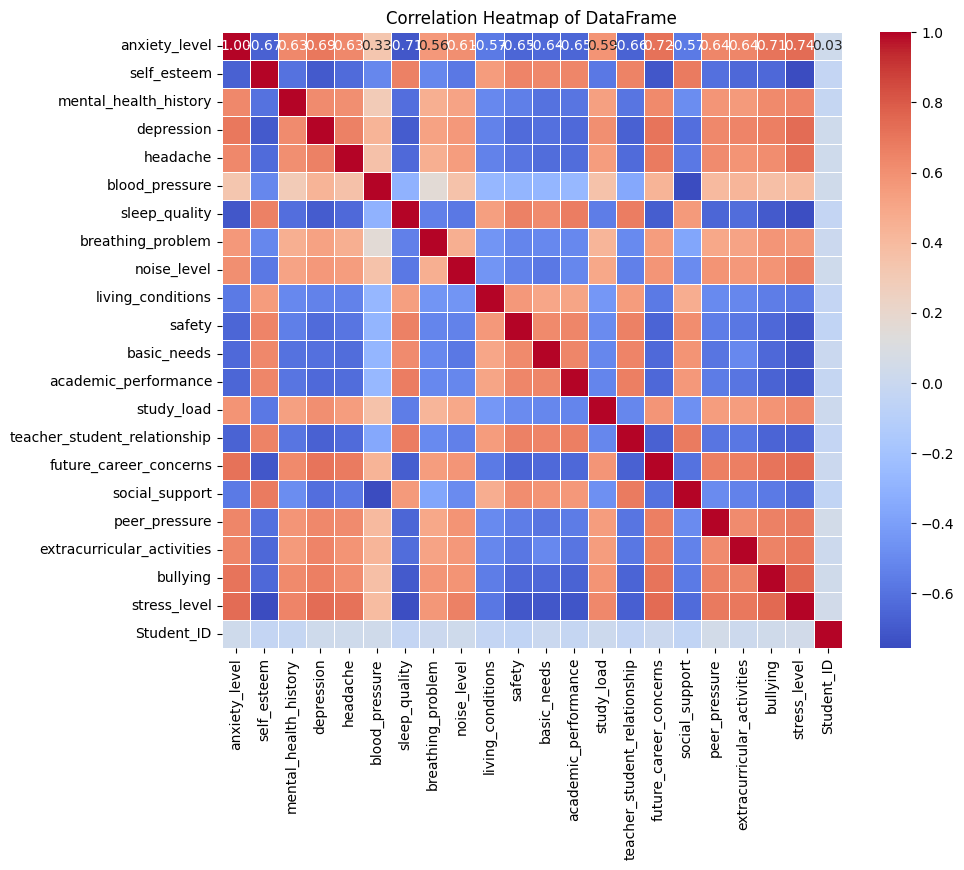

In [541]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of DataFrame')
plt.show()

In [542]:
df.columns.unique()

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level', 'Student_ID'],
      dtype='object')

for the model i will drop the features where the correlation is very lowwer than 0.7.

In [543]:
df_important_feat = df[['anxiety_level', 'self_esteem', 'depression',
                        'headache', 'sleep_quality', 'safety', 
                        'basic_needs', 'academic_performance', 
                        'future_career_concerns', 'bullying', 'stress_level']]

In [544]:
# Set a static randomstate for the models
rstate = 42

# Split the data into features and target
features = ['anxiety_level', 'self_esteem', 'depression',
            'headache', 'sleep_quality', 'safety', 
            'basic_needs', 'academic_performance', 
            'future_career_concerns', 'bullying', ]

# Convert the target variable to one-hot encoding
target = to_categorical(df['stress_level'])  # -1 because classes are 1, 2, 3

X = df_important_feat[features]
y = target  # Use the original target variable directly

In [545]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=rstate)

In [546]:
# Build the Feedforward Neural Network model
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(10,)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Optional: Dropout layer for regularization
    layers.Dense(32, activation='linear'),
    layers.Dense(3, activation='softmax')  # Use 'sigmoid' for binary classification
])

# Set hyperparameters
batch_size = 48
epochs = 10
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)

# Train the model
H = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
28/28 [==============================] - 1s 6ms/step - loss: 0.5917 - accuracy: 0.5227 - val_loss: 0.3850 - val_accuracy: 0.6773
Epoch 2/10
28/28 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.6966 - val_loss: 0.3042 - val_accuracy: 0.8182
Epoch 3/10
28/28 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8068 - val_loss: 0.2653 - val_accuracy: 0.8682
Epoch 4/10
28/28 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8420 - val_loss: 0.2394 - val_accuracy: 0.8909
Epoch 5/10
28/28 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.8591 - val_loss: 0.2180 - val_accuracy: 0.9045
Epoch 6/10
28/28 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.8670 - val_loss: 0.2037 - val_accuracy: 0.9045
Epoch 7/10
28/28 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.8761 - val_loss: 0.1914 - val_accuracy: 0.9136
Epoch 8/10
28/28 [==

In [547]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate and print the classification report
report = classification_report(y_test_classes, y_pred_classes)
print(report)

7/7 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        76
           1       0.88      0.95      0.91        73
           2       0.93      0.93      0.93        71

    accuracy                           0.92       220
   macro avg       0.92      0.92      0.92       220
weighted avg       0.92      0.92      0.92       220



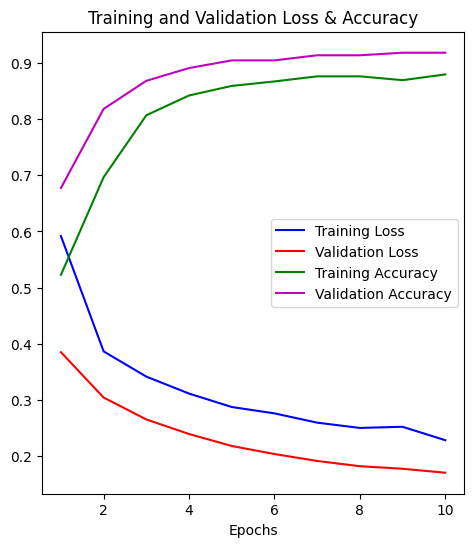

In [548]:
# # Accessing training history
train_loss = H.history['loss']
val_loss = H.history['val_loss']
train_accuracy = H.history['accuracy']
val_accuracy = H.history['val_accuracy']

# # Plotting training history
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))

# Plotting loss and accuracy on the same subplot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.plot(epochs, train_accuracy, 'g-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'm-', label='Validation Accuracy')
plt.title('Training and Validation Loss & Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

as we can see from the plot above both the training and validation lines are very similar indicating that there is no sign of overfitting.

To check the validity of the model I have created a plan.

First step would be to have 10 people fill in a survey.
This would be the conten of the survey.

please rate how much anxiety you feel on a scale of 0-21 where 0 is none at all and 21 is always,       
please rate your selfesteem on a scale of 0-30,         
please rate how depressed you feel on a scale of 0-27,              
please rate how often you suffer from a headache on a scale of 0-5,         
please rate your sleep quality on a scale of 0-5,                   
please rate how safe you feel in your daily life on a scale of 0-5,             
please rate if your basic needs are met on a scale of 0-5,          
please rate your academic performance on a scale of 0-5,                    
please rate how much concern you have for a future career on a scale of 0-5,             
please rate how often you are bullied on a scale of 0-5,                
please rate how stressed you generally feel on a scale of 0-2           